<h1 style="font-size: 36px; text-align: center">Candidate Elimination</h1>


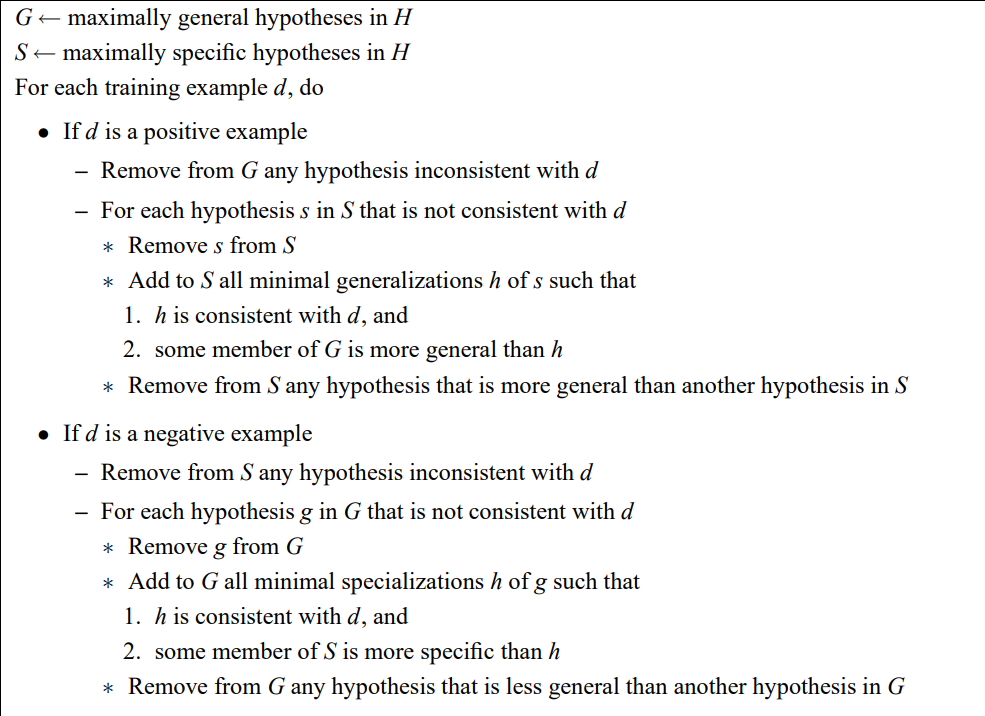

In [14]:
import pandas as pd
pd.__version__

'1.5.3'

In [15]:
df = pd.read_excel("CandidateEx.xlsx")
df

,Size,Shape,Colour,Surface,Thickness,Label
0,Big,Circular,Light,Smooth,Thick,Yes
1,Big,Circular,Light,Rough,Thick,Yes
2,Big,Elliptical,Dark,Smooth,Thin,No
3,Big,Elliptical,Light,Rough,Thick,Yes
4,Small,Circular,Light,Smooth,Thick,No


In [16]:
X = []
for col_name, col_data in df.items():
    X.append(list(set(col_data)))
X

[['Small', 'Big'],
 ['Circular', 'Elliptical'],
 ['Dark', 'Light'],
 ['Smooth', 'Rough'],
 ['Thin', 'Thick'],
 ['No', 'Yes']]

In [17]:
def opcheck(row, hypothesis):
    for i in range(len(hypothesis)):
        if hypothesis[i] != row[i] and hypothesis[i] != "?":
            # print(hypothesis)
            return False
    return True

In [18]:
# S will only update when there is a positive output
# G will only update when there is a negative output
 

S = ["Null" for i in range(df.shape[1]-1)]
G = [["?" for i in range(df.shape[1]-1)]]
print("Initial hypotheses:")
print("-"*80)
print("S0:", S, "\nG0:", G)
print("-"*80, "\n")
print("Candidate Elimination begins: \n")
temp = []
for index, row in df.iterrows():
    
    # FOR POSITIVE EXAMPLES
    if row[-1] == "Yes":
        # We check for inconsistencies in G and if found, we remove those inconsistencies
        # We update S to be minimally generalized such that it satisfies 
        # the training example
        
        # Detecting inconsistencies in G
        for g in G:
            for j in range(len(g)):
                if g[j] != row[j] and g[j] != "?":
                    temp.append(g)
                    break
                    
        # Removing the inconsistencies in G
        for vals in temp:
            G.remove(vals)
        temp.clear()
        
        # Minimally generalize S
        for i in range(len(row)-1):
            if S[i] != row[i] and S[i] != "Null":
                S[i] = "?"
            elif S[i] == "Null":
                S[i] = row[i]
        
        
    # FOR NEGATIVE EXAMPLES
    elif row[-1] == "No":
        # We check for inconsistencies in S and if found, we make the entire S as NULL
        # We update G to make it minimally specific such that it satisfies the current 
        # and the previous training examples as well
        
        # Updating G with minimally specific hypotheses using a temp list 
        for g in G:
            flag = 0
            # The below loop compares all the features in a hypothesis with the training
            # example and adds to temp, those which satisfy the training example
            
            # Does that by setting a flag when a mismatch is detected b/w the feature 
            # of the hypothesis and the training example
            for j in range(len(g)):
                if g[j] != row[j] and g[j] != "?":
                    flag = 1
                    temp.append(g.copy())
                    break
                    
            # The remaining hypotheses in G are ones which do not satisfy the training
            # example. The following loops minimally specifies them such that they 
            # satisfy the training example and then adds them to temp
            if flag == 0:
                for j in range(len(g)):
                    g_temp = g.copy()
                    if g[j] == "?":
                        for val in X[j]:
                            if(val != row[j]):
                                g_temp[j] = val
                                temp.append(g_temp.copy())
                                
        G = temp.copy(); # Contents of temp are copied into G and temp is cleared
        temp.clear();
        
        # This loop checks for inconsistencies in S and rectifies them
        flag = 0
        for i in range(len(S)):
            if S[i] != row[i]:
                flag = 1
                break
        if flag == 0:
            S = ["Null" for i in range(df.shape[1]-1)]
            
    
    # This loop checks if the determined hypotheses satisfy a;/ll previous training
    # examples as well
    for g in G:        
        for ind in range(0,index+1):
            if opcheck(df.iloc[ind],g) == False and df.iloc[ind][-1] == "Yes":
                if g not in temp:
                    temp.append(g)
    
    # Removing those hypotheses from G which do not satisfy previous training values
    for val in temp:
        G.remove(val)
    temp.clear()
    
    print(f"S{index+1}:", S)
    print(f"G{index+1}:", G, "\n")
    
print("\nFinal Hypotheses")
print("-"*80)
print("S = ", S)
print("G = ", G)
print("-"*80)

Initial hypotheses:
--------------------------------------------------------------------------------
S0: ['Null', 'Null', 'Null', 'Null', 'Null'] 
G0: [['?', '?', '?', '?', '?']]
-------------------------------------------------------------------------------- 

Candidate Elimination begins: 

S1: ['Big', 'Circular', 'Light', 'Smooth', 'Thick']
G1: [['?', '?', '?', '?', '?']] 

S2: ['Big', 'Circular', 'Light', '?', 'Thick']
G2: [['?', '?', '?', '?', '?']] 

S3: ['Big', 'Circular', 'Light', '?', 'Thick']
G3: [['?', 'Circular', '?', '?', '?'], ['?', '?', 'Light', '?', '?'], ['?', '?', '?', '?', 'Thick']] 

S4: ['Big', '?', 'Light', '?', 'Thick']
G4: [['?', '?', 'Light', '?', '?'], ['?', '?', '?', '?', 'Thick']] 

S5: ['Big', '?', 'Light', '?', 'Thick']
G5: [['Big', '?', 'Light', '?', '?'], ['Big', '?', '?', '?', 'Thick']] 


Final Hypotheses
--------------------------------------------------------------------------------
S =  ['Big', '?', 'Light', '?', 'Thick']
G =  [['Big', '?', 'Light',